## Import them all

In [1]:
import numpy as np
import torch

from PIL import Image
from argparse import ArgumentParser

from torch.optim import SGD, Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import Compose, CenterCrop, Normalize
from torchvision.transforms import ToTensor, ToPILImage


from piwise.network import UNet
from piwise.criterion import CrossEntropyLoss2d
from piwise.transform import Relabel, ToLabel, Colorize

## Setup the model

In [2]:
NUM_CHANNELS = 2
NUM_CLASSES = 2

Net = UNet
model = Net(NUM_CLASSES)
model = model.cuda()




# Load the Data

In [3]:
in_vals = torch.from_numpy(np.load('data/inputs.npy'))
out_vals = torch.from_numpy(np.load('data/outputs.npy')).long()
out_vals[out_vals==2]=0
loader = DataLoader(TensorDataset(in_vals,out_vals), shuffle=True)

In [7]:
images, labels = next(iter(loader))

In [9]:
images.size()

torch.Size([1, 2, 512, 512])

In [10]:
labels.size()

torch.Size([1, 512, 512])

In [15]:
labels.min()

0


( 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.LongTensor of size 1x512x512]

# Train the model

In [4]:
model.train()
weight = torch.ones(NUM_CLASSES)
weight[0] = 0      
criterion = CrossEntropyLoss2d()
optimizer = Adam(model.parameters())
epoch_loss = []
for epoch in range(1, 1201):
    

    for step, (images, labels) in enumerate(loader):
        images = images.cuda()
        labels = labels.cuda()

        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        
        epoch_loss.append((loss.data[0]))
print("Training complete.")

/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/torch/nn/functional.py:807: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


Training complete.


# Evaluate the model

In [123]:
model.eval()
input = in_vals[0].cuda()
output = model(Variable(input).unsqueeze(0))
target = out_vals[0]

/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/torch/nn/functional.py:807: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


In [118]:
in_vals[0]


( 0 ,.,.) = 
  0.1589  0.1705  0.1662  ...   0.1267  0.1235  0.1225
  0.1637  0.1674  0.1904  ...   0.1250  0.1320  0.1277
  0.1640  0.1789  0.2128  ...   0.1491  0.1235  0.1280
           ...             ⋱             ...          
  0.1641  0.1701  0.1740  ...   0.1600  0.1476  0.1374
  0.1647  0.1715  0.1728  ...   0.1405  0.1533  0.1296
  0.1645  0.1688  0.1731  ...   0.1470  0.1447  0.1413

( 1 ,.,.) = 
  0.4860  0.4687  0.4967  ...   0.5057  0.5056  0.4886
  0.4874  0.3967  0.3581  ...   0.3457  0.3638  0.4207
  0.5884  0.4652  0.3381  ...   0.2232  0.3661  0.4659
           ...             ⋱             ...          
  0.5557  0.4003  0.2948  ...   0.2454  0.3123  0.4652
  0.5691  0.4141  0.3407  ...   0.3395  0.3520  0.5009
  0.5670  0.4884  0.4769  ...   0.4551  0.4887  0.5289
[torch.FloatTensor of size 2x512x512]

In [85]:
import matplotlib.pyplot as plt

In [101]:
plt.plot(epoch_loss)

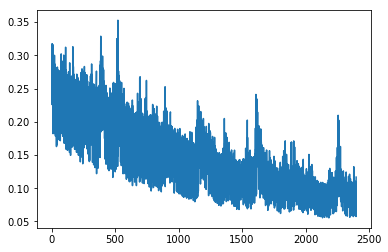

In [102]:
plt.show()

In [88]:
plt.close()

In [89]:
plt

<module 'matplotlib.pyplot' from '/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [90]:
plt.show()

In [93]:
total_loss[0]

[0.3048296570777893,
 0.26992830634117126,
 0.21971377730369568,
 0.3078896999359131,
 0.25278031826019287,
 0.315354585647583,
 0.32046425342559814,
 0.2827519178390503,
 0.2295074164867401,
 0.24371883273124695,
 0.24803948402404785,
 0.3288705050945282]

In [95]:
for data in total_loss:
    total_loss[total_loss.index(data)]=(sum(data)/len(data))

In [96]:
total_loss

[0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682

In [97]:
len(total_loss)

240

In [100]:
len(epoch_loss)

2400

In [103]:
plt.close()

In [1]:
print("")

In [2]:
outputs

NameError: name 'outputs' is not defined

In [8]:
loss

Variable containing:
 0.2872
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [9]:
len(outputs)

1

In [10]:
outputs

Variable containing:
( 0 , 0 ,.,.) = 
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0003   -0.0002
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0003   -0.0002
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0004   -0.0002
              ...                ⋱                ...             
    0.0000    0.0000   -0.0099  ...    -0.0006   -0.0001   -0.0000
    0.0000    0.0000   -0.0058  ...    -0.0005   -0.0001   -0.0000
    0.0000    0.0000   -0.0027  ...    -0.0006   -0.0001   -0.0000

( 0 , 1 ,.,.) = 
 -130.6586 -141.0657 -134.0111  ...    -9.1870   -8.1220   -8.5708
 -137.8547 -152.5382 -145.0304  ...    -9.2002   -8.0936   -8.4820
 -135.6483 -151.1954 -140.7107  ...    -8.6472   -7.8555   -8.6487
              ...                ⋱                ...             
  -19.7559  -15.4810   -4.6197  ...    -7.5016   -9.6865  -11.3605
  -19.7216  -15.4697   -5.1476  ...    -7.6631   -9.7064  -11.1755
  -21.6215  -16.5262   -5.9275  ...    -7.4841   -9.7662  -11.1235
[torch

In [11]:
len(inputs)

1

In [12]:
inputs

Variable containing:
( 0 , 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 0 , 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 1x2x512x512 (GPU 0)]

In [13]:
targets

Variable containing:
( 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.cuda.LongTensor of size 1x512x512 (GPU 0)]

In [14]:
import matplotlib.pyplot as plt

In [5]:
inputs

Variable containing:
( 0 , 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 0 , 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 1x2x512x512 (GPU 0)]

In [6]:
inputs[0]

Variable containing:
( 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 2x512x512 (GPU 0)]

In [7]:
inputs[0][0]

Variable containing:
 0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
 0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
 0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
          ...             ⋱             ...          
 0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
 0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
 0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530
[torch.cuda.FloatTensor of size 512x512 (GPU 0)]

In [11]:
inputs.numpy()

AttributeError: numpy

In [12]:
type(epoch_loss)

list

In [14]:
import torchvision.transforms as transforms

In [15]:
type(inputs)

torch.autograd.variable.Variable

In [16]:
inputs.data


( 0 , 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 0 , 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 1x2x512x512 (GPU 0)]

In [17]:
in_data = inputs.data

In [18]:
in_data[0]


( 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 2x512x512 (GPU 0)]

In [20]:
in_data = in_data.cpu().numpy()

In [21]:
in_data[0]

array([[[ 0.16316062,  0.16635096,  0.17639376, ...,  0.15360597,
          0.14382622,  0.14283477],
        [ 0.15378946,  0.16316502,  0.17489046, ...,  0.14080514,
          0.14458518,  0.13715032],
        [ 0.15859944,  0.16304576,  0.16409355, ...,  0.16956688,
          0.15097506,  0.15197003],
        ..., 
        [ 0.16679515,  0.17097092,  0.17198054, ...,  0.15644141,
          0.1589486 ,  0.15108033],
        [ 0.16733174,  0.16876887,  0.18233101, ...,  0.15569478,
          0.15361907,  0.15164891],
        [ 0.16717061,  0.17001158,  0.17098331, ...,  0.1542408 ,
          0.15545598,  0.15299416]],

       [[ 0.47826493,  0.42326367,  0.450001  , ...,  0.45447284,
          0.42492807,  0.44899014],
        [ 0.46386907,  0.34324229,  0.30350161, ...,  0.34880888,
          0.31208694,  0.37008175],
        [ 0.56308478,  0.41729066,  0.43107864, ...,  0.33095342,
          0.32663727,  0.45566463],
        ..., 
        [ 0.47259474,  0.21403037,  0.14805916, ...,

In [25]:
in_data = in_data[0]

In [26]:
in_data.shape

(2, 512, 512)

In [28]:
in_data[0].shape

(512, 512)

In [29]:
in_data_avg = in_data[0]
in_data_corr = in_data[1]

In [30]:
import matplotlib.pyplot as plt

In [31]:
in_data_avg.shape

(512, 512)

In [32]:
plt.plot(in_data_avg)

In [40]:
plt.imshow(in_data_avg)

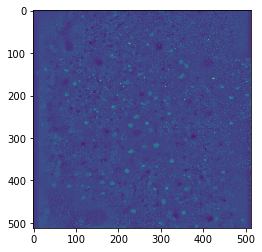

In [41]:
plt.show()

In [35]:
plt.scatter(inputs)

TypeError: scatter() missing 1 required positional argument: 'y'

In [42]:
plt.close()

In [37]:
outputs

Variable containing:
( 0 , 0 ,.,.) = 
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
              ...                ⋱                ...             
    0.0000    0.0000    0.0000  ...    -0.0015   -0.0016   -0.0005
    0.0000    0.0000    0.0000  ...    -0.0010   -0.0011   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0006   -0.0006   -0.0002

( 0 , 1 ,.,.) = 
  -11.4968  -11.6935  -16.2736  ...   -12.3924  -11.3546   -9.2380
  -10.9247  -11.8120  -16.0689  ...   -12.3173  -11.2108   -9.3384
  -13.8128  -14.8385  -19.5957  ...   -11.9522  -11.1532   -9.1427
              ...                ⋱                ...             
 -190.6380 -156.6431 -146.9271  ...    -6.5011   -6.4165   -7.6353
 -194.1123 -161.5599 -150.3468  ...    -6.8927   -6.8494   -7.9792
 -186.8277 -154.5044 -142.3669  ...    -7.3864   -7.3529   -8.5361
[torch

In [43]:
plt.figure(1)

In [44]:
plt.subplot(111)

In [45]:
plt.close()

In [46]:
plt.figure()

In [47]:
avg = plt.subplot(111)

In [59]:
plt.close()

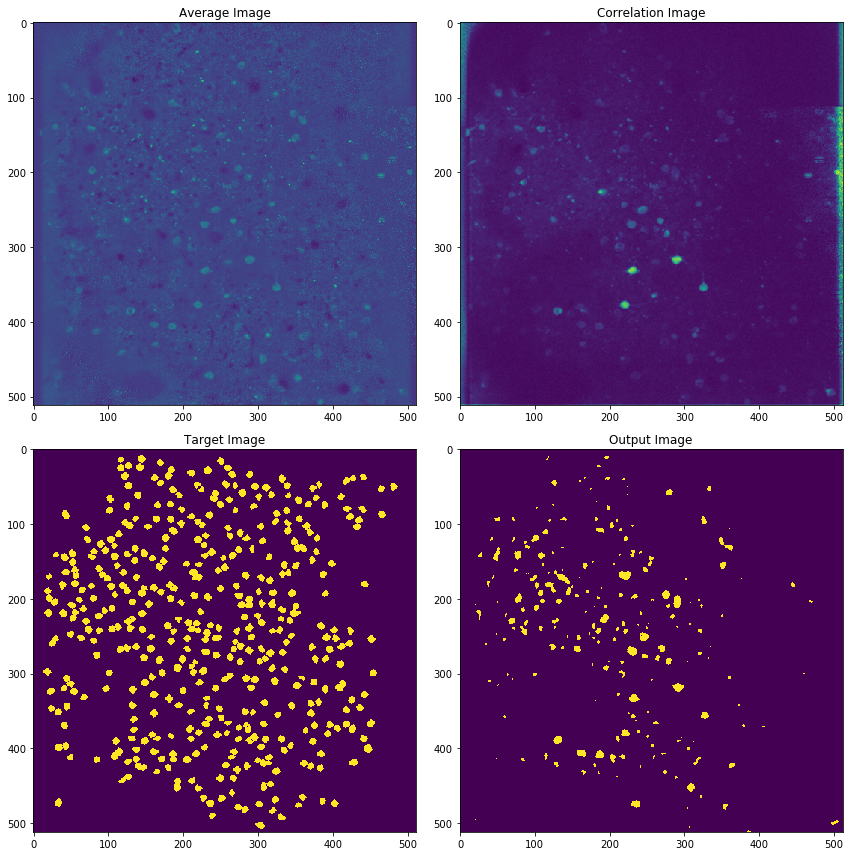

In [115]:
plt.figure()

plt.subplots(figsize=(12,12))

avg = plt.subplot(221)
corr = plt.subplot(222)
tgt = plt.subplot(223)
out = plt.subplot(224)


avg.title.set_text("Average Image")
corr.title.set_text("Correlation Image")
tgt.title.set_text("Target Image")
out.title.set_text("Output Image")

avg.imshow(in_data_avg)
corr.imshow(in_data_corr)
tgt.imshow(tgt_data)
out.imshow(pos.squeeze())



plt.tight_layout()



In [63]:
in_data_avg

array([[ 0.16316062,  0.16635096,  0.17639376, ...,  0.15360597,
         0.14382622,  0.14283477],
       [ 0.15378946,  0.16316502,  0.17489046, ...,  0.14080514,
         0.14458518,  0.13715032],
       [ 0.15859944,  0.16304576,  0.16409355, ...,  0.16956688,
         0.15097506,  0.15197003],
       ..., 
       [ 0.16679515,  0.17097092,  0.17198054, ...,  0.15644141,
         0.1589486 ,  0.15108033],
       [ 0.16733174,  0.16876887,  0.18233101, ...,  0.15569478,
         0.15361907,  0.15164891],
       [ 0.16717061,  0.17001158,  0.17098331, ...,  0.1542408 ,
         0.15545598,  0.15299416]], dtype=float32)

In [64]:
in_data

array([[[ 0.16316062,  0.16635096,  0.17639376, ...,  0.15360597,
          0.14382622,  0.14283477],
        [ 0.15378946,  0.16316502,  0.17489046, ...,  0.14080514,
          0.14458518,  0.13715032],
        [ 0.15859944,  0.16304576,  0.16409355, ...,  0.16956688,
          0.15097506,  0.15197003],
        ..., 
        [ 0.16679515,  0.17097092,  0.17198054, ...,  0.15644141,
          0.1589486 ,  0.15108033],
        [ 0.16733174,  0.16876887,  0.18233101, ...,  0.15569478,
          0.15361907,  0.15164891],
        [ 0.16717061,  0.17001158,  0.17098331, ...,  0.1542408 ,
          0.15545598,  0.15299416]],

       [[ 0.47826493,  0.42326367,  0.450001  , ...,  0.45447284,
          0.42492807,  0.44899014],
        [ 0.46386907,  0.34324229,  0.30350161, ...,  0.34880888,
          0.31208694,  0.37008175],
        [ 0.56308478,  0.41729066,  0.43107864, ...,  0.33095342,
          0.32663727,  0.45566463],
        ..., 
        [ 0.47259474,  0.21403037,  0.14805916, ...,

In [65]:
in_data_corr

array([[ 0.47826493,  0.42326367,  0.450001  , ...,  0.45447284,
         0.42492807,  0.44899014],
       [ 0.46386907,  0.34324229,  0.30350161, ...,  0.34880888,
         0.31208694,  0.37008175],
       [ 0.56308478,  0.41729066,  0.43107864, ...,  0.33095342,
         0.32663727,  0.45566463],
       ..., 
       [ 0.47259474,  0.21403037,  0.14805916, ...,  0.17454506,
         0.18640901,  0.37621588],
       [ 0.49490204,  0.34776437,  0.2687442 , ...,  0.33502641,
         0.3698715 ,  0.44495702],
       [ 0.55422443,  0.48249346,  0.46206778, ...,  0.53268647,
         0.54525238,  0.56019479]], dtype=float32)

In [66]:
plt.imshow(in_data_corr)

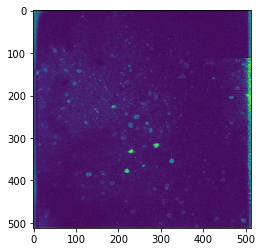

In [67]:
plt.show()

In [68]:
targets

Variable containing:
( 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.cuda.LongTensor of size 1x512x512 (GPU 0)]

In [71]:
targets.data.cpu().numpy().shape

(1, 512, 512)

In [76]:
tgt_data = targets.data.cpu().numpy()

In [77]:
tgt_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [80]:
tgt_data[0].shape

(512, 512)

In [81]:
tgt_data = tgt_data[0]

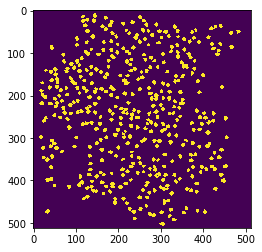

In [82]:
plt.imshow(tgt_data)
plt.show()

In [83]:
output

NameError: name 'output' is not defined

In [84]:
outputs

Variable containing:
( 0 , 0 ,.,.) = 
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0001
              ...                ⋱                ...             
    0.0000    0.0000    0.0000  ...    -0.0015   -0.0016   -0.0005
    0.0000    0.0000    0.0000  ...    -0.0010   -0.0011   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0006   -0.0006   -0.0002

( 0 , 1 ,.,.) = 
  -11.4968  -11.6935  -16.2736  ...   -12.3924  -11.3546   -9.2380
  -10.9247  -11.8120  -16.0689  ...   -12.3173  -11.2108   -9.3384
  -13.8128  -14.8385  -19.5957  ...   -11.9522  -11.1532   -9.1427
              ...                ⋱                ...             
 -190.6380 -156.6431 -146.9271  ...    -6.5011   -6.4165   -7.6353
 -194.1123 -161.5599 -150.3468  ...    -6.8927   -6.8494   -7.9792
 -186.8277 -154.5044 -142.3669  ...    -7.3864   -7.3529   -8.5361
[torch

In [85]:
out_data = outputs.data.cpu().numpy()

In [86]:
out_data

array([[[[ -1.00135803e-05,  -8.10623169e-06,   0.00000000e+00, ...,
           -4.29153442e-06,  -1.14440918e-05,  -9.72747803e-05],
         [ -1.81198120e-05,  -7.15255737e-06,   0.00000000e+00, ...,
           -4.29153442e-06,  -1.33514404e-05,  -8.77380371e-05],
         [ -9.53674316e-07,  -4.76837158e-07,   0.00000000e+00, ...,
           -6.19888306e-06,  -1.43051147e-05,  -1.06811523e-04],
         ..., 
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -1.50299072e-03,  -1.63555145e-03,  -4.83274460e-04],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -1.01566315e-03,  -1.06072426e-03,  -3.42607498e-04],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -6.19888306e-04,  -6.40869141e-04,  -1.96218491e-04]],

        [[ -1.14968433e+01,  -1.16934996e+01,  -1.62736301e+01, ...,
           -1.23923702e+01,  -1.13546486e+01,  -9.23801231e+00],
         [ -1.09247103e+01,  -1.18120394e+01,

In [87]:
out_data.shape

(1, 2, 512, 512)

In [91]:
indicator  =  np.arange(out_data.shape[1]).reshape([1, -1, 1, 1])

In [93]:
np.sum(out_data * indicator, axis=1)

array([[[ -11.49684334,  -11.69349957,  -16.27363014, ...,  -12.39237022,
          -11.35464859,   -9.23801231],
        [ -10.92471027,  -11.81203938,  -16.06885147, ...,  -12.31733704,
          -11.21084785,   -9.3383913 ],
        [ -13.81275177,  -14.83848572,  -19.59571648, ...,  -11.95216751,
          -11.15320778,   -9.14266968],
        ..., 
        [-190.63795471, -156.64305115, -146.92712402, ...,   -6.50112152,
           -6.41654015,   -7.63525772],
        [-194.11231995, -161.55990601, -150.34681702, ...,   -6.89267349,
           -6.8493619 ,   -7.97922421],
        [-186.82766724, -154.50437927, -142.36688232, ...,   -7.3864398 ,
           -7.35290527,   -8.53611374]]])

In [94]:
out_data

array([[[[ -1.00135803e-05,  -8.10623169e-06,   0.00000000e+00, ...,
           -4.29153442e-06,  -1.14440918e-05,  -9.72747803e-05],
         [ -1.81198120e-05,  -7.15255737e-06,   0.00000000e+00, ...,
           -4.29153442e-06,  -1.33514404e-05,  -8.77380371e-05],
         [ -9.53674316e-07,  -4.76837158e-07,   0.00000000e+00, ...,
           -6.19888306e-06,  -1.43051147e-05,  -1.06811523e-04],
         ..., 
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -1.50299072e-03,  -1.63555145e-03,  -4.83274460e-04],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -1.01566315e-03,  -1.06072426e-03,  -3.42607498e-04],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           -6.19888306e-04,  -6.40869141e-04,  -1.96218491e-04]],

        [[ -1.14968433e+01,  -1.16934996e+01,  -1.62736301e+01, ...,
           -1.23923702e+01,  -1.13546486e+01,  -9.23801231e+00],
         [ -1.09247103e+01,  -1.18120394e+01,

In [95]:
x = np.exp(out_data)
res = x / x.sum(1)

In [96]:
res

array([[[[  9.99989867e-01,   9.99991655e-01,   9.99999881e-01, ...,
            9.99995828e-01,   9.99988317e-01,   9.99902725e-01],
         [  9.99981999e-01,   9.99992609e-01,   9.99999881e-01, ...,
            9.99995470e-01,   9.99986529e-01,   9.99912024e-01],
         [  9.99999046e-01,   9.99999642e-01,   1.00000000e+00, ...,
            9.99993563e-01,   9.99985695e-01,   9.99892950e-01],
         ..., 
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            9.98498261e-01,   9.98365641e-01,   9.99516904e-01],
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            9.98984754e-01,   9.98939872e-01,   9.99657512e-01],
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            9.99380410e-01,   9.99359310e-01,   9.99803782e-01]],

        [[  1.01621208e-05,   8.34790626e-06,   8.55957509e-08, ...,
            4.15013346e-06,   1.17149020e-05,   9.72707421e-05],
         [  1.80077168e-05,   7.41474742e-06,

In [103]:
pos = np.argmax(res, axis=1)

In [216]:
%matplotlib inline

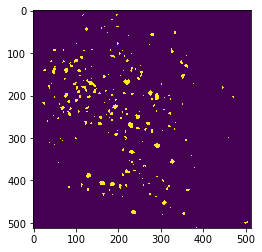

In [110]:
plt.imshow(pos.squeeze())

In [124]:
output

Variable containing:
( 0 , 0 ,.,.) = 
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000    0.0000
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0000
    0.0000    0.0000    0.0000  ...    -0.0000   -0.0000    0.0000
              ...                ⋱                ...             
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0006   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0005   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0006   -0.0003

( 0 , 1 ,.,.) = 
  -13.3207  -13.0796  -16.6392  ...   -13.4896  -13.4061  -15.3661
  -12.9927  -13.1335  -16.8340  ...   -12.4121  -12.8217  -14.7939
  -15.9665  -16.1363  -19.9743  ...   -13.4200  -13.6876  -15.7663
              ...                ⋱                ...             
  -99.3404  -91.6641  -83.4998  ...    -9.2109   -7.4776   -7.9988
 -101.7319  -93.3468  -85.9116  ...    -8.7253   -7.5477   -8.2139
  -97.3720  -90.2214  -80.9712  ...    -8.6473   -7.4862   -8.1011
[torch

In [125]:
target


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.LongTensor of size 512x512]

In [126]:
output[0]

Variable containing:
( 0 ,.,.) = 
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000    0.0000
   -0.0000   -0.0000    0.0000  ...    -0.0000   -0.0000   -0.0000
    0.0000    0.0000    0.0000  ...    -0.0000   -0.0000    0.0000
              ...                ⋱                ...             
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0006   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0005   -0.0003
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0006   -0.0003

( 1 ,.,.) = 
  -13.3207  -13.0796  -16.6392  ...   -13.4896  -13.4061  -15.3661
  -12.9927  -13.1335  -16.8340  ...   -12.4121  -12.8217  -14.7939
  -15.9665  -16.1363  -19.9743  ...   -13.4200  -13.6876  -15.7663
              ...                ⋱                ...             
  -99.3404  -91.6641  -83.4998  ...    -9.2109   -7.4776   -7.9988
 -101.7319  -93.3468  -85.9116  ...    -8.7253   -7.5477   -8.2139
  -97.3720  -90.2214  -80.9712  ...    -8.6473   -7.4862   -8.1011
[torch.cuda.Fl

In [127]:
output[0][0]

Variable containing:
-0.0000 -0.0000  0.0000  ...  -0.0000 -0.0000  0.0000
-0.0000 -0.0000  0.0000  ...  -0.0000 -0.0000 -0.0000
 0.0000  0.0000  0.0000  ...  -0.0000 -0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...  -0.0001 -0.0006 -0.0003
 0.0000  0.0000  0.0000  ...  -0.0002 -0.0005 -0.0003
 0.0000  0.0000  0.0000  ...  -0.0002 -0.0006 -0.0003
[torch.cuda.FloatTensor of size 512x512 (GPU 0)]

In [128]:
plt.close()

In [129]:
overlap = plt.figure()

In [130]:
overlap = plt.figure(figsize=(12,12))

In [136]:
image = np.array([tgt_data,pos.squeeze(),0])

In [134]:
image.shape

(3,)

ValueError: condition must be a 1-d array

In [138]:
overlap = plt.figure(figsize=(12,12))

In [139]:
overlap.show()

/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [141]:
plt.show(overlap)

In [142]:
overlap

In [143]:
plt.close()

[]

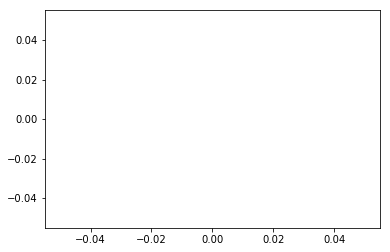

In [145]:
plt.plot(figsize=(12, 12))

TypeError: Image data can not convert to float

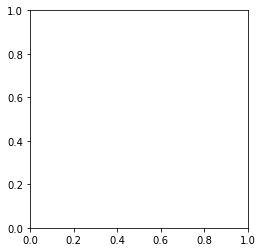

In [146]:
plt.imshow(image)

In [178]:
x = np.zeros((512,512, 3))

In [195]:
x[0][0][0]

0.0

In [157]:
out_image= pos.squeeze()

In [158]:
out_image.shape

(512, 512)

In [163]:
x.shape

(3, 512, 512)

In [164]:
x[0].shape

(512, 512)

In [165]:
x[1].shape

(512, 512)

In [170]:
tgt_data.shape

(512, 512)

In [169]:
type(x[0])

numpy.ndarray

In [171]:
x[0]=tgt_data
x[1]=out_image

In [172]:
x[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [173]:
x[2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

TypeError: Invalid dimensions for image data

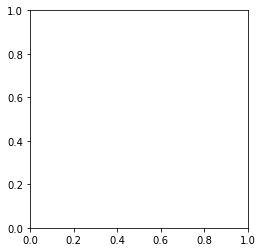

In [174]:
plt.imshow(x)

In [175]:
x[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [176]:
x[1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [177]:
out_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [196]:
x[0]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [197]:
x[0].shape

(512, 3)

In [198]:
x[511][511][0]

0.0

In [203]:
for a in x:
    for b in a:
        b[0]=tgt_data[a][b]
        b[1]=out_image[a][b]

IndexError: arrays used as indices must be of integer (or boolean) type

In [202]:
tgt_data[0][0]

0

In [204]:
for h in range(0, 512):
    for w in range(0, 512):
        x[w][h][0]=tgt_data[w][h]
        x[w][h][1]=out_image[w][h]

In [206]:
x[x==1].sum()

35612.0

In [210]:
overlap.add_axes()

In [211]:
overlap = plt.figure(figsize=(12,12))

In [212]:
overlap.add_subplot(111)

In [218]:
img = overlap.subplot(111)

AttributeError: 'Figure' object has no attribute 'subplot'

In [214]:
img

In [215]:
img.imshow(x)

(<matplotlib.figure.Figure at 0x7f92caad0710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92caa0bda0>)

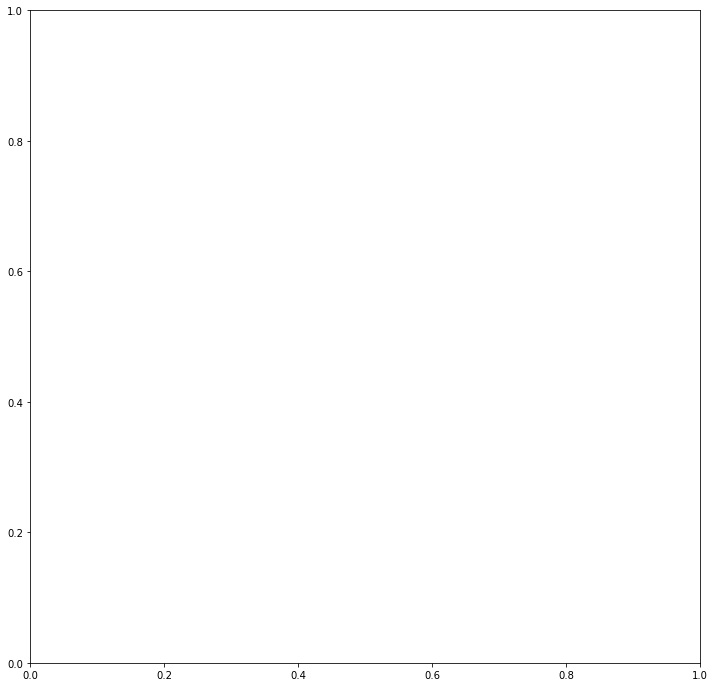

In [236]:
plt.subplots(figsize=(12,12))


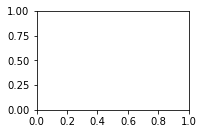

In [237]:
img = plt.subplot(221)

In [240]:
img.imshow(x)

In [242]:
overlap.figimage(x)

AttributeError: 'FigureImage' object has no attribute 'show'

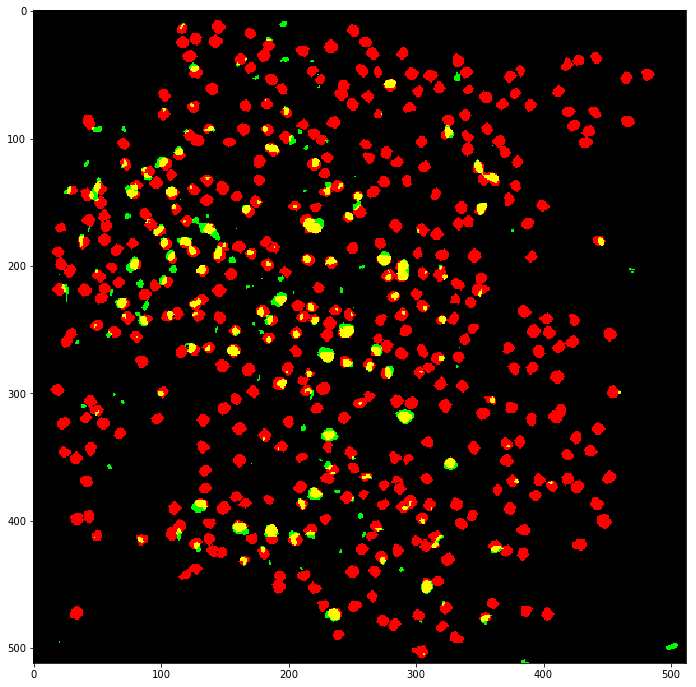

In [244]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(x)